In [1]:
# Import the required libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adamax

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
# Uploadeding zip file of dataset downloaded from kaggle and unzip it for model training and evaluation
!unzip archive
%ls

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/Tr-gl_0732.jpg  
  inflating: Training/glioma/

In [6]:
# Reading the training directory. Making filepath and labels ready for importing images for training
training_directory = './Training'     # Training folder path
file_paths = []   # creating the blank list to add complete filepath of training images
classes = []   # Creating blank list to add class labels in the list

folders = os.listdir(training_directory)
print(folders)

for folder in folders:
    folder_path = os.path.join(training_directory, folder)
    file_list = os.listdir(folder_path)
    for file in file_list:
        file_path = os.path.join(folder_path, file)

        file_paths.append(file_path)
        classes.append(folder)

# Creating dataframe ready with training files and class lables
Fpath_list = pd.Series(file_paths, name= 'file_paths')
class_list = pd.Series(classes, name='classes')

training_df = pd.concat([Fpath_list, class_list], axis= 1)

['pituitary', 'notumor', 'meningioma', 'glioma']


In [7]:
training_df

,file_paths,classes
0,./Training/pituitary/Tr-pi_1410.jpg,pituitary
1,./Training/pituitary/Tr-pi_1391.jpg,pituitary
2,./Training/pituitary/Tr-pi_0662.jpg,pituitary
3,./Training/pituitary/Tr-pi_1329.jpg,pituitary
4,./Training/pituitary/Tr-pi_0835.jpg,pituitary
...,...,...
5707,./Training/glioma/Tr-gl_1016.jpg,glioma
5708,./Training/glioma/Tr-gl_0414.jpg,glioma
5709,./Training/glioma/Tr-gl_0376.jpg,glioma
5710,./Training/glioma/Tr-gl_1020.jpg,glioma


In [8]:
# Reading the testing directory.
# Making filepath and labels ready for importing images from testing directory
testing_directory = './Testing'
file_paths = []
classes = []

folders = os.listdir(testing_directory)
for folder in folders:
    fold_path = os.path.join(testing_directory, folder)
    file_list = os.listdir(fold_path)
    for file in file_list:
        file_path = os.path.join(fold_path, file)

        file_paths.append(file_path)
        classes.append(folder)

# Concatenate data paths with labels into one dataframe
Fpath_list = pd.Series(file_paths, name= 'file_paths')
class_list = pd.Series(classes, name='classes')
testing_df = pd.concat([Fpath_list, class_list], axis= 1)

In [9]:
testing_df

,file_paths,classes
0,./Testing/pituitary/Te-pi_0054.jpg,pituitary
1,./Testing/pituitary/Te-pi_0217.jpg,pituitary
2,./Testing/pituitary/Te-pi_0113.jpg,pituitary
3,./Testing/pituitary/Te-pi_0086.jpg,pituitary
4,./Testing/pituitary/Te-pi_0288.jpg,pituitary
...,...,...
1306,./Testing/glioma/Te-gl_0269.jpg,glioma
1307,./Testing/glioma/Te-gl_0284.jpg,glioma
1308,./Testing/glioma/Te-gl_0261.jpg,glioma
1309,./Testing/glioma/Te-gl_0287.jpg,glioma


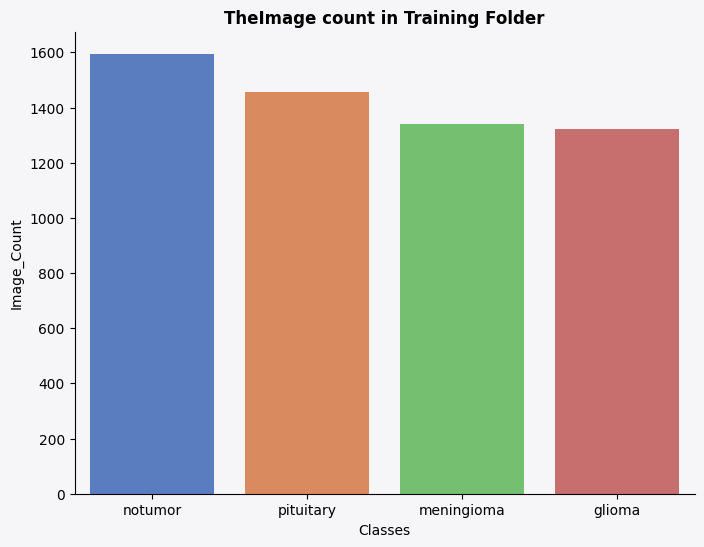

In [11]:
# Counting the images in training df and plotting bar graph for class counts
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

class_counts = training_df["classes"].value_counts()     # Counting the images

# Plotting the bar graph
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted', ax=ax)
ax.set_xlabel("Classes")
ax.set_ylabel("Image_Count")
ax.set_title("TheImage count in Training Folder", weight="bold")
plt.show()

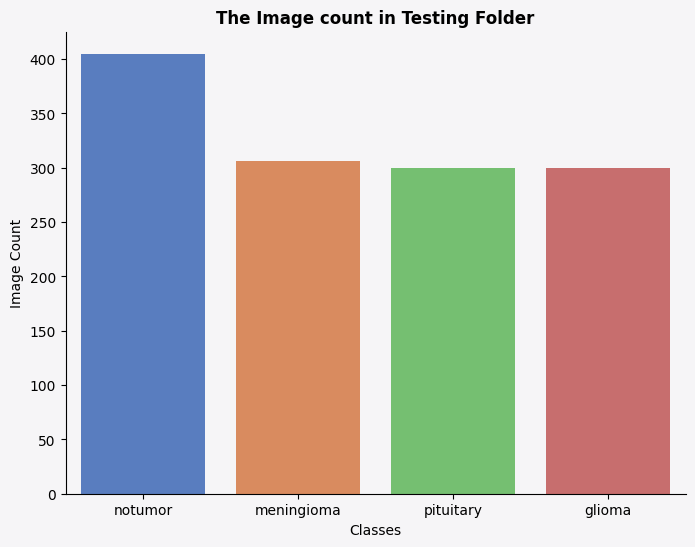

In [12]:
# Counting the images in testing df and plotting bar graph for class counts
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

class_counts = testing_df["classes"].value_counts()     # Counting the images

# Plotting the bar graph with vertical bars
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted', ax=ax)
ax.set_xlabel("Classes")
ax.set_ylabel("Image Count")
ax.set_title("The Image count in Testing Folder", weight="bold")
plt.show()

In [13]:
# Splitting the validation dataframe from testing dataframe
validation_df, testing_df = train_test_split(testing_df,  train_size= 0.5, shuffle= True, random_state= 42)

In [14]:
# Creating image data generator for train, test, valid dataframes.
# This will augment few images for model generalization
batch_size = 16      # defining the batch size
img_size = (224, 224)

training_generator = ImageDataGenerator()
testing_generator = ImageDataGenerator()

training_gen = training_generator.flow_from_dataframe( training_df, x_col= 'file_paths', y_col= 'classes', target_size= img_size,
                                    class_mode= 'categorical', color_mode= 'rgb', shuffle= True, batch_size= batch_size)

validation_gen = testing_generator.flow_from_dataframe( validation_df, x_col= 'file_paths', y_col= 'classes', target_size= img_size,
                                    class_mode= 'categorical', color_mode= 'rgb', shuffle= True, batch_size= batch_size)

testing_gen = testing_generator.flow_from_dataframe( testing_df, x_col= 'file_paths', y_col= 'classes', target_size= img_size,
                                    class_mode= 'categorical', color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


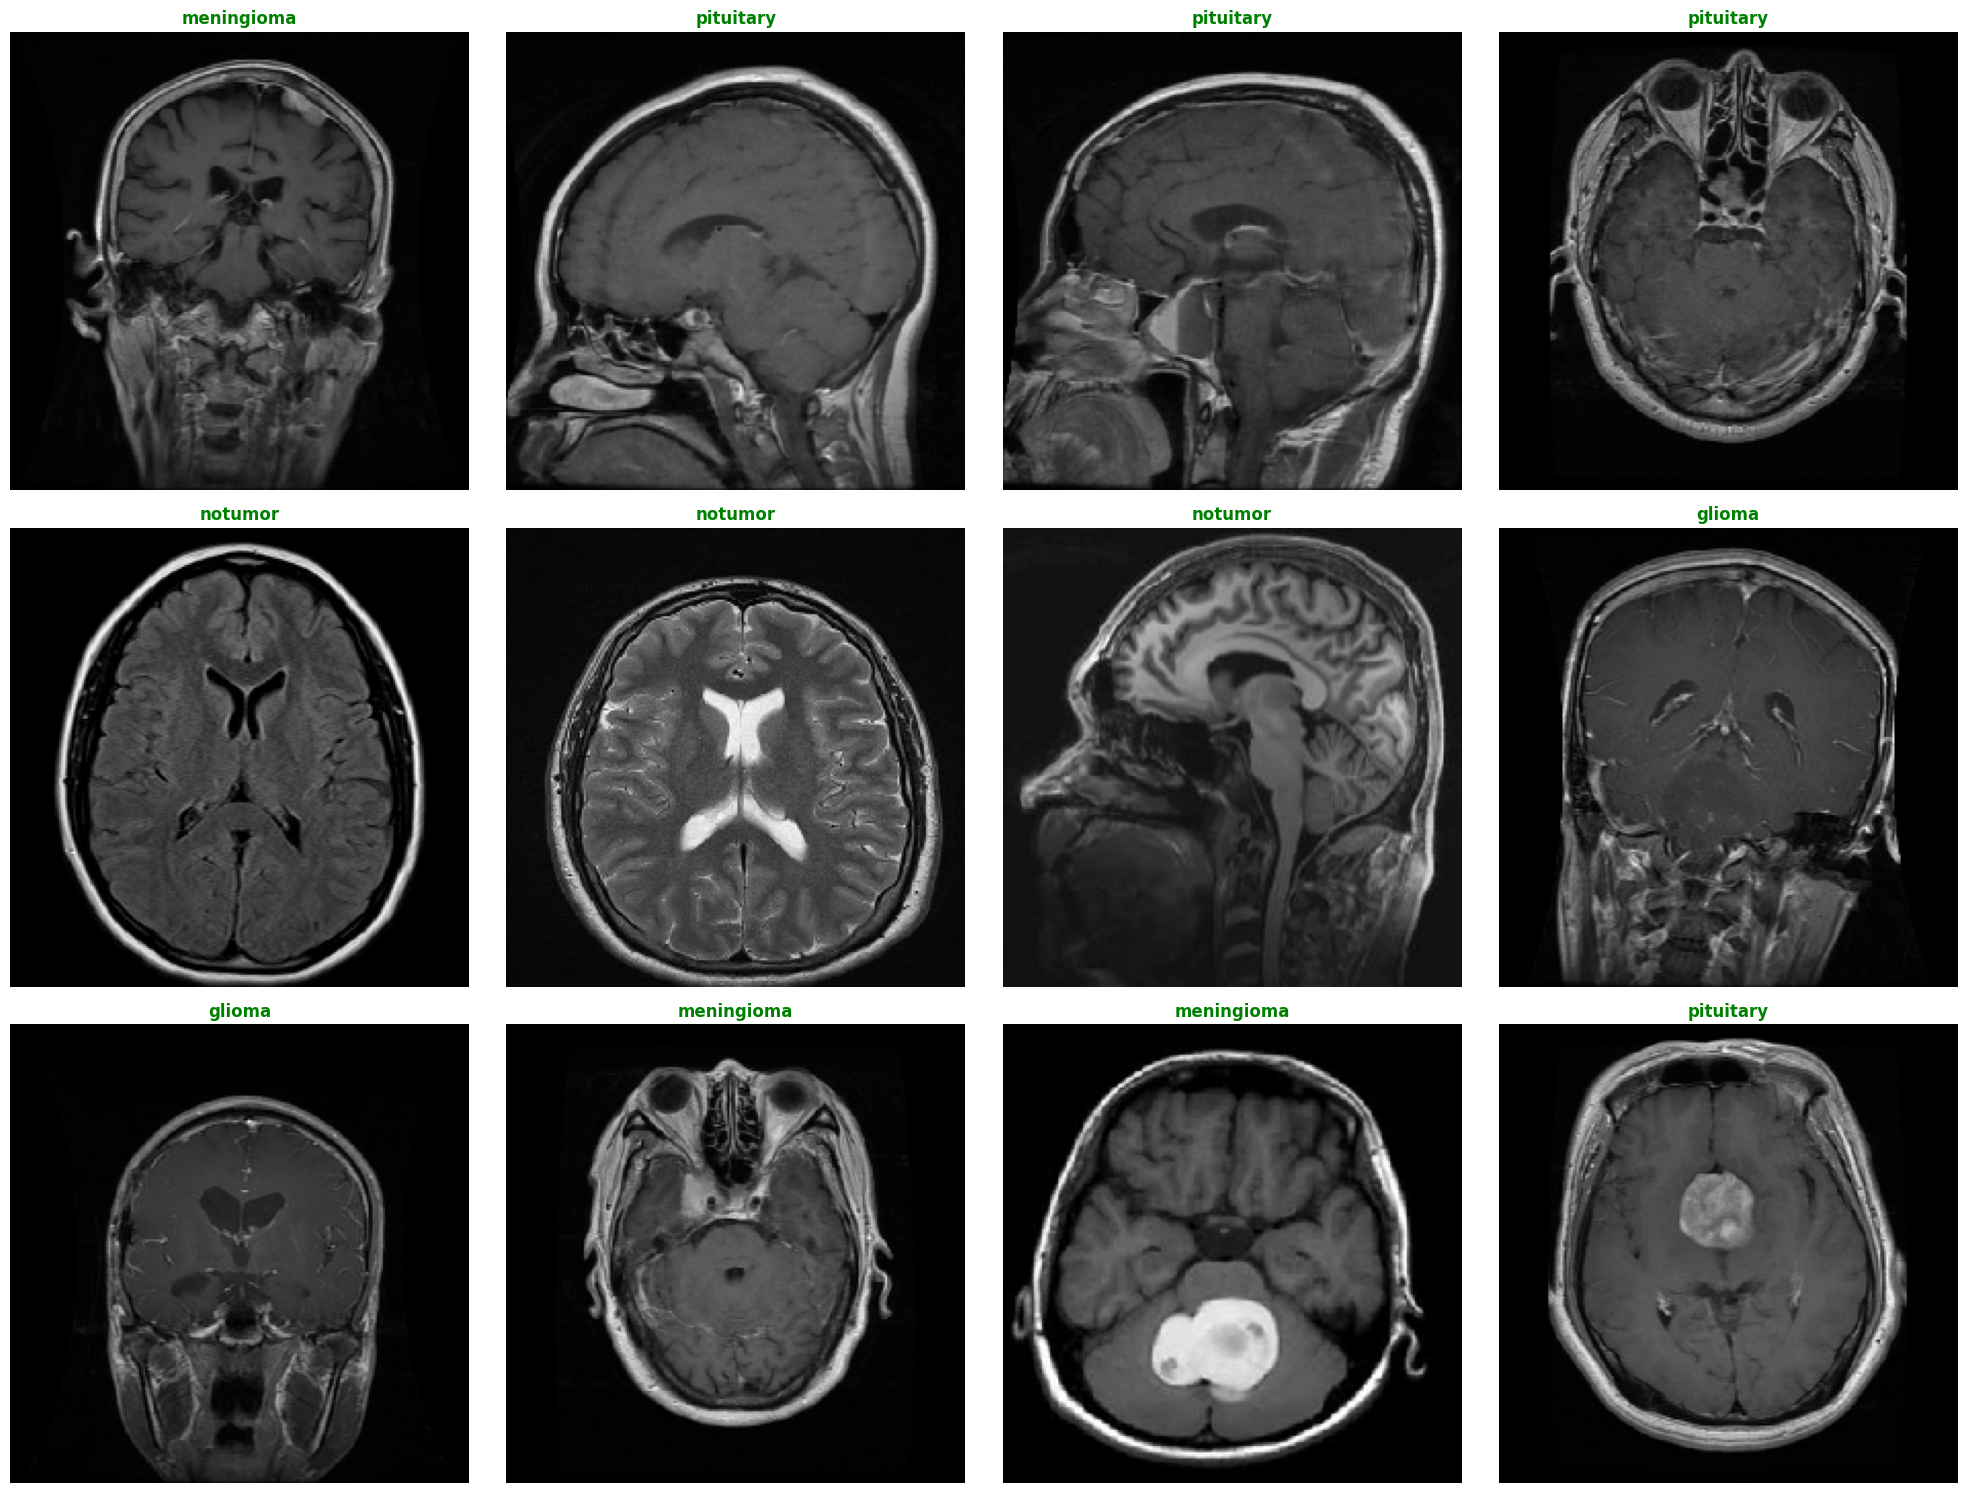

In [15]:
# Plotting few images from train generator
g_dict = training_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(training_gen)


plt.figure(figsize= (20, 20))  # figure size

for i in range(12):            # number of images to show
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255    # normalizing each images
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'green', fontsize= 12, weight="bold")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
# Building CNN model for classification with 13 convolution layers, 5 max pooling layers, & 3 dense layers
img_shape = (224, 224, 3)        # Input image size dimesion
class_count = len(list(training_gen.class_indices.keys()))
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")           # considering multiclass problem, softmax
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [38]:
history = model.fit(training_gen, epochs= 20, verbose= 1, validation_data= validation_gen, shuffle= False)

Epoch 1/20
357/357 [==============================] - 82s 231ms/step - loss: 0.8855 - accuracy: 0.6129 - val_loss: 0.6975 - val_accuracy: 0.7282
Epoch 2/20
357/357 [==============================] - 83s 231ms/step - loss: 0.4868 - accuracy: 0.8155 - val_loss: 0.5744 - val_accuracy: 0.7954
Epoch 3/20
357/357 [==============================] - 83s 232ms/step - loss: 0.3171 - accuracy: 0.8869 - val_loss: 0.3797 - val_accuracy: 0.8550
Epoch 4/20
357/357 [==============================] - 83s 231ms/step - loss: 0.2589 - accuracy: 0.9060 - val_loss: 0.6920 - val_accuracy: 0.8275
Epoch 5/20
357/357 [==============================] - 82s 230ms/step - loss: 0.2006 - accuracy: 0.9298 - val_loss: 0.3938 - val_accuracy: 0.8809
Epoch 6/20
357/357 [==============================] - 83s 232ms/step - loss: 0.1663 - accuracy: 0.9401 - val_loss: 0.2869 - val_accuracy: 0.9053
Epoch 7/20
357/357 [==============================] - 82s 230ms/step - loss: 0.1249 - accuracy: 0.9561 - val_loss: 0.3553 - val_ac

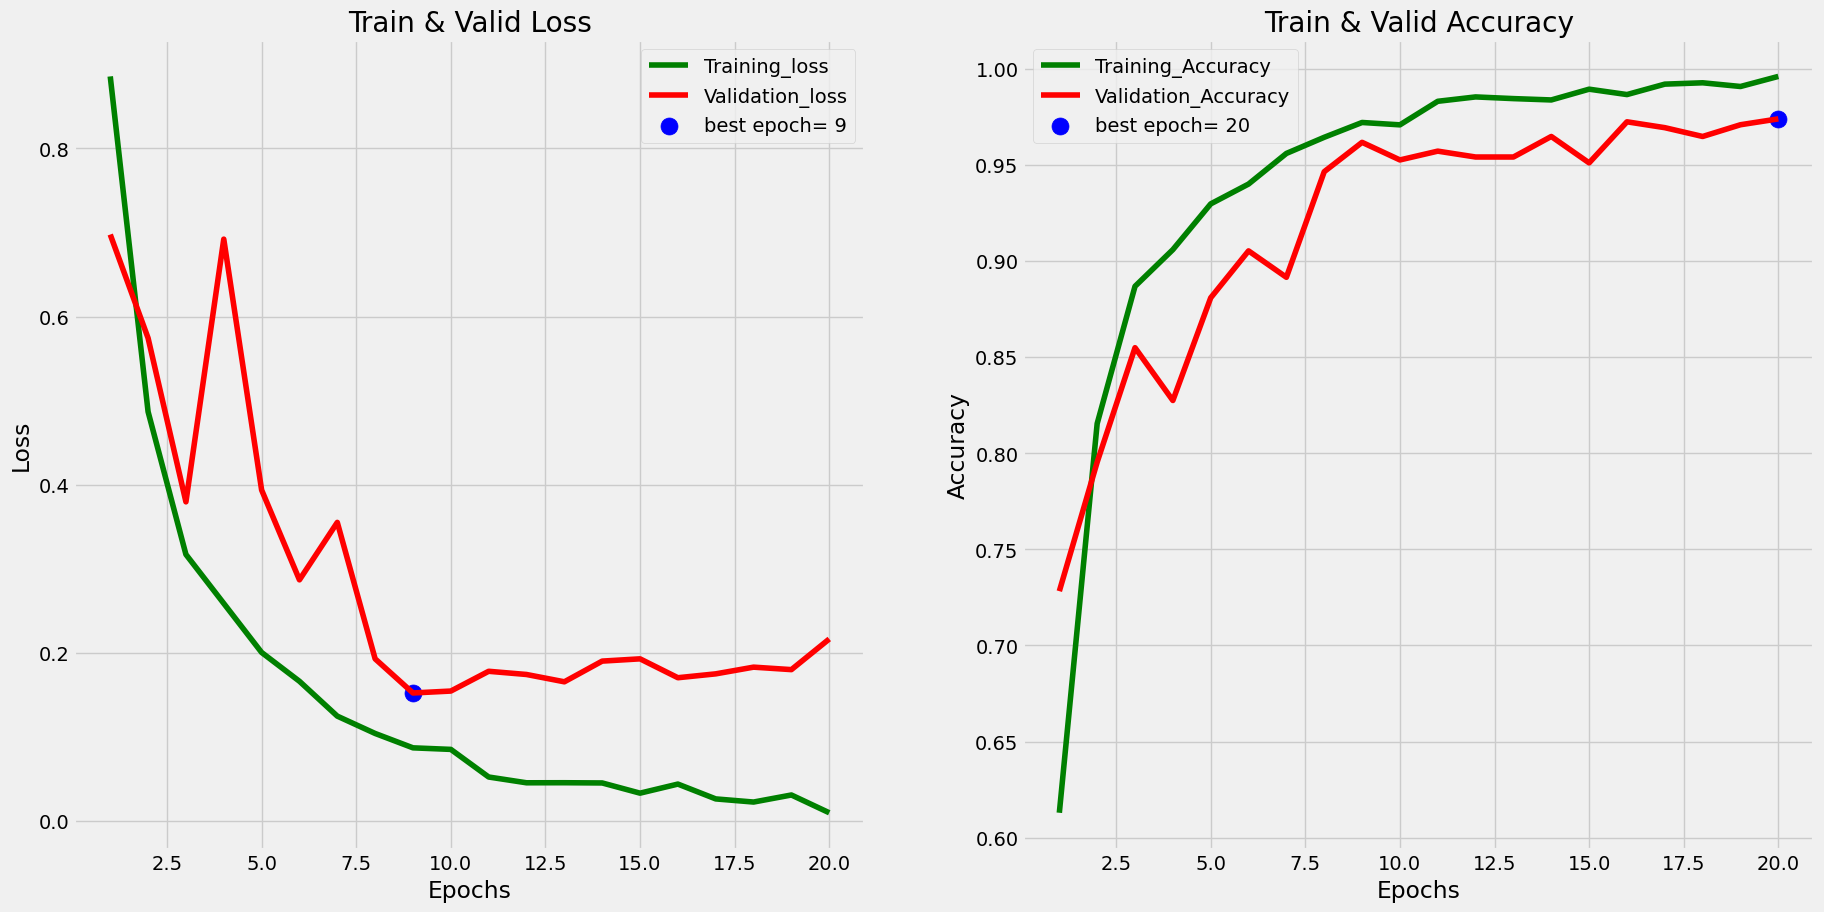

In [39]:
# Plotting history of trained mpdel
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
valid_accuracy = history.history['val_accuracy']
valid_loss = history.history['val_loss']
index_loss = np.argmin(valid_loss)
valid_lowest = valid_loss[index_loss]
index_accuracy = np.argmax(valid_accuracy)
accuracy_highest = valid_accuracy[index_accuracy]

Epochs = [i+1 for i in range(len(train_accuracy))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_accuracy + 1)}'

plt.figure(figsize= (20, 10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)    # Plot for loss
plt.plot(Epochs, train_loss, 'g', label= 'Training_loss')
plt.plot(Epochs, valid_loss, 'r', label= 'Validation_loss')
plt.scatter(index_loss + 1, valid_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Train & Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)    # plot for accuracy
plt.plot(Epochs, train_accuracy, 'g', label= 'Training_Accuracy')
plt.plot(Epochs, valid_accuracy, 'r', label= 'Validation_Accuracy')
plt.scatter(index_accuracy + 1 , accuracy_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Train & Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [40]:
# Model evaluation on training, testing, & validation dataset
train_score = model.evaluate(training_gen, verbose= 1)
valid_score = model.evaluate(validation_gen, verbose= 1)
test_score = model.evaluate(testing_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 3s 66ms/step - loss: 0.2042 - accuracy: 0.9710
Train Loss:  0.0011428918223828077
Train Accuracy:  0.9996498823165894
--------------------
Validation Loss:  0.21662414073944092
Validation Accuracy:  0.9740458130836487
--------------------
Test Loss:  0.20422981679439545
Test Accuracy:  0.9710366129875183


In [41]:
# predicting probabilities & classes for testing data
preds = model.predict(testing_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 3s 65ms/step


[[137  11   0   1]
 [  2 142   3   1]
 [  0   0 208   0]
 [  0   1   0 150]]


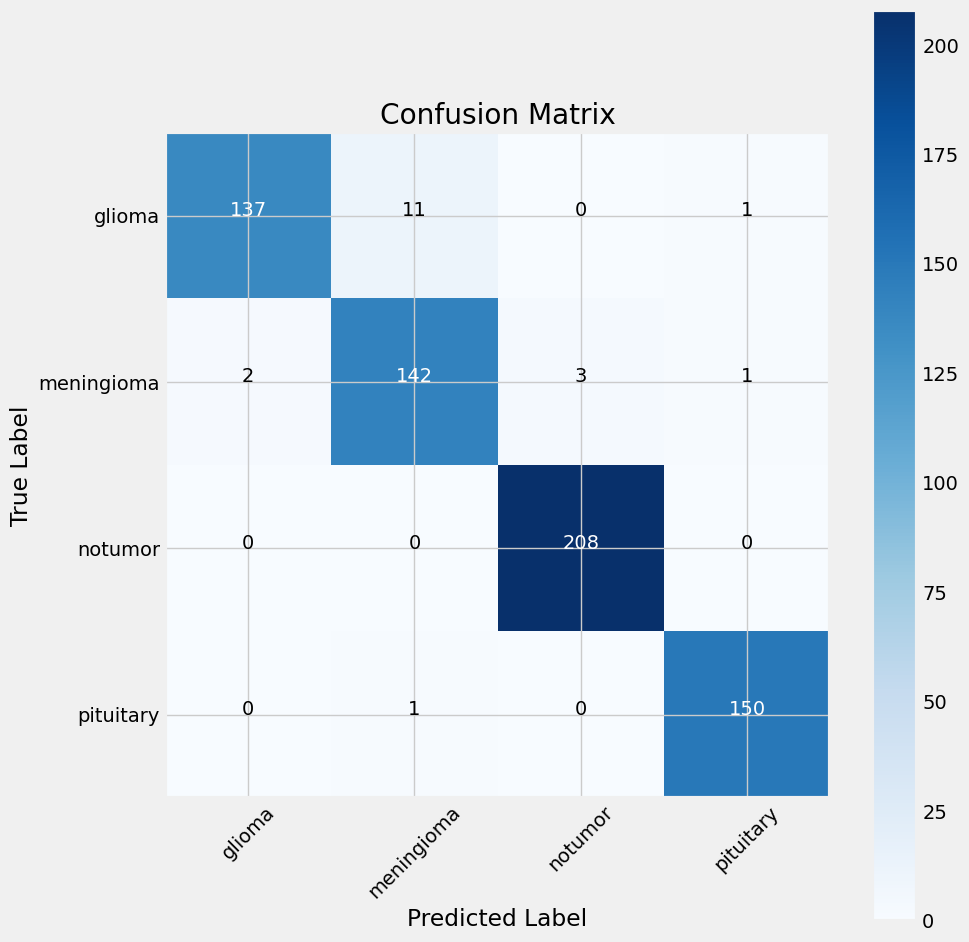

In [42]:
# confusion matrix and other parameters
import itertools

g_dict = testing_gen.class_indices
classes = list(g_dict.keys())

con_matrix = confusion_matrix(testing_gen.classes, y_pred)
print(con_matrix)

plt.figure(figsize= (10, 10))      # fig size
plt.imshow(con_matrix, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = con_matrix.max() / 2.
for i, j in itertools.product(range(con_matrix.shape[0]), range(con_matrix.shape[1])):
    plt.text(j, i, con_matrix[i, j], horizontalalignment= 'center', color= 'white' if con_matrix[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [23]:
# Classification report
print(classification_report(testing_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.82      0.82      0.82       149
  meningioma       0.69      0.43      0.53       148
     notumor       0.82      0.98      0.89       208
   pituitary       0.87      0.96      0.91       151

    accuracy                           0.82       656
   macro avg       0.80      0.80      0.79       656
weighted avg       0.80      0.82      0.80       656



## Image Augmentation

In [24]:
# Importing important libraries
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from shutil import copyfile

# Define paths
training_directory = './Training'
output_data_dir = './Augmented_Training'     # path for storing augmented images

# Create output directory if it doesn't exist
if not os.path.exists(output_data_dir):
    os.makedirs(output_data_dir)

# Define image augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and augment images
for class_folder in os.listdir(training_directory):
    class_folder_path = os.path.join(training_directory, class_folder)
    output_class_folder_path = os.path.join(output_data_dir, class_folder)

    # Create output class folder if it doesn't exist
    if not os.path.exists(output_class_folder_path):
        os.makedirs(output_class_folder_path)

    for filename in os.listdir(class_folder_path):
        img_path = os.path.join(class_folder_path, filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Generate augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_folder_path, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= 5:  # Generate 5 augmented images per original image
                break

In [25]:
# Generate data paths with labels
aug_train_data_dir = './Augmented_Training'
file_paths = []
classes = []

folds = os.listdir(aug_train_data_dir)
print(folds)

for fold in folds:
    foldpath = os.path.join(aug_train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        file_paths.append(fpath)
        classes.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(file_paths, name= 'file_paths')
Lseries = pd.Series(classes, name='classes')

aug_train_df = pd.concat([Fseries, Lseries], axis= 1)

['pituitary', 'notumor', 'meningioma', 'glioma']


In [26]:
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

aug_train_gen = tr_gen.flow_from_dataframe( aug_train_df, x_col= 'file_paths', y_col= 'classes', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( validation_df, x_col= 'file_paths', y_col= 'classes', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( testing_df, x_col= 'file_paths', y_col= 'classes', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 20368 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


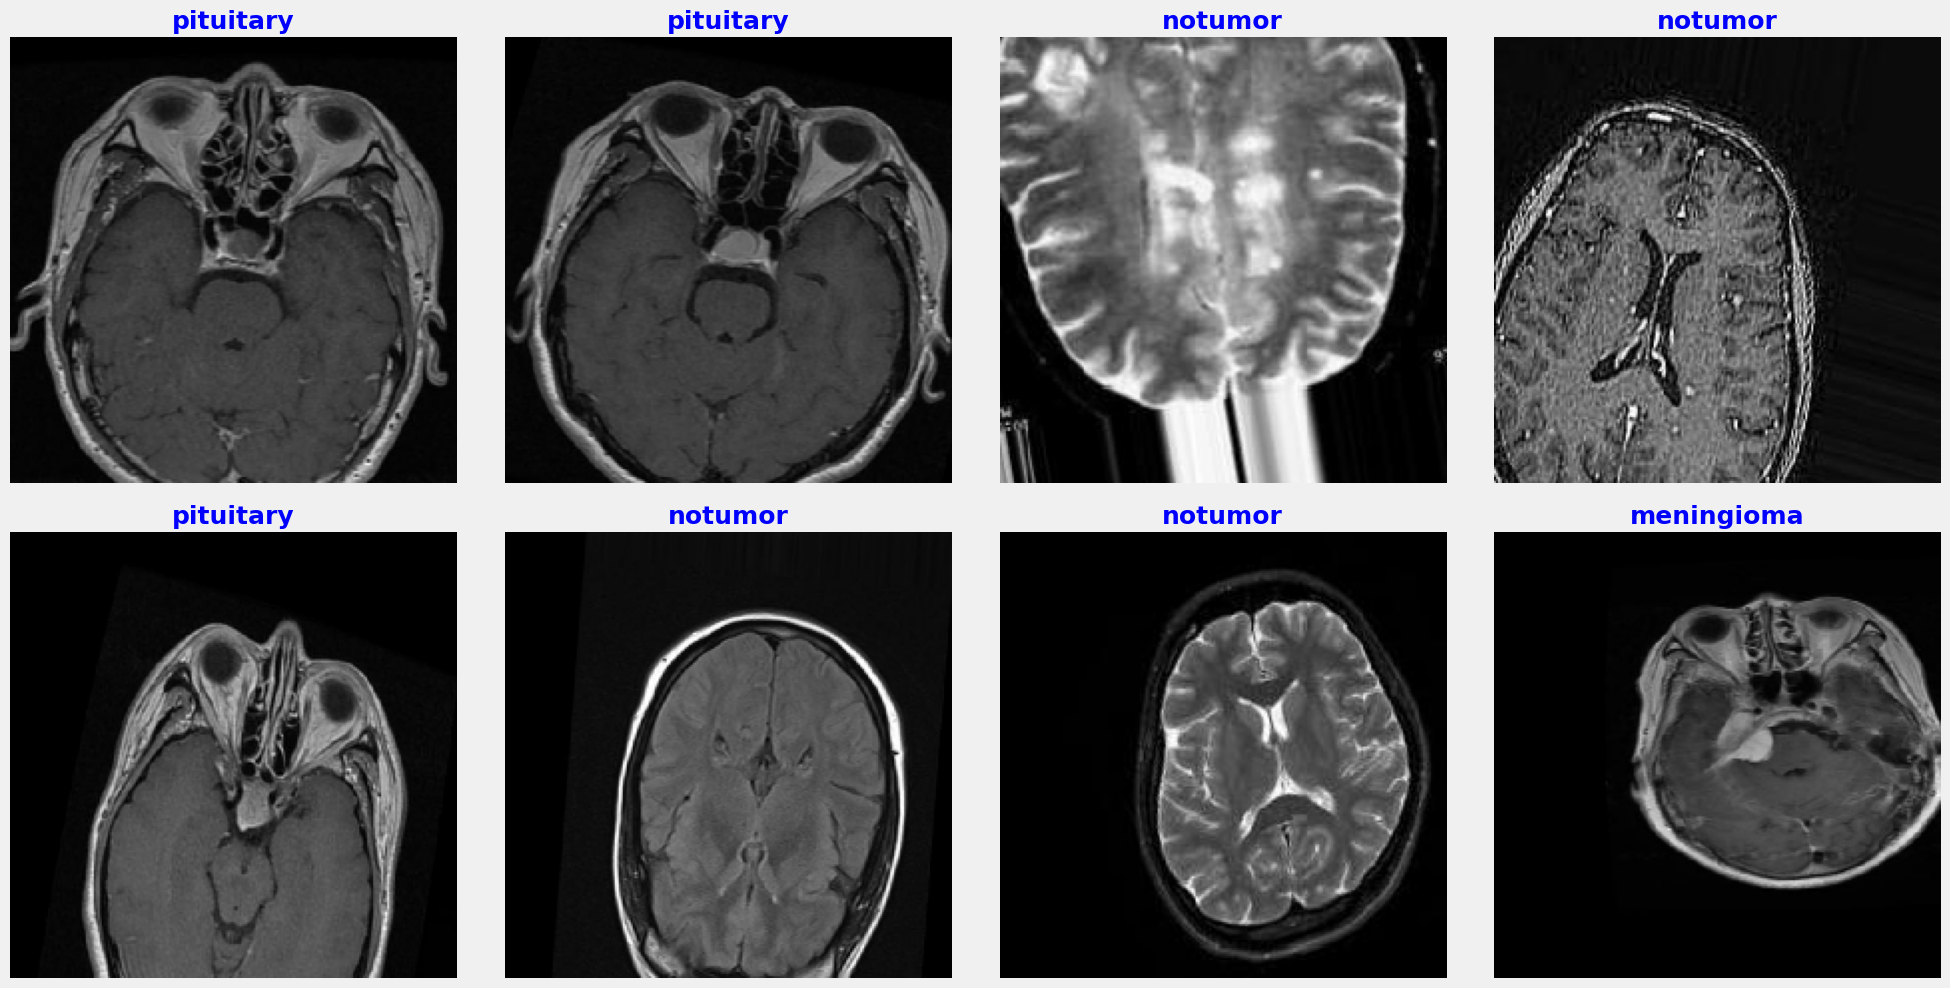

In [27]:
# viewing some random images from augmented images
aug_g_dict = aug_train_gen.class_indices
classes = list(aug_g_dict.keys())
images, labels = next(aug_train_gen)


plt.figure(figsize= (20, 20))    # image dimension

for i in range(8):               # No of images to draw
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      # Normalizing the images
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 18, weight="bold")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
# Using the same convolution model as used earlier for augmented data
img_shape = (224, 224, 3)
class_count = len(list(aug_train_gen.class_indices.keys()))
model2 = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model2.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [29]:
history = model2.fit(aug_train_gen, epochs= 20, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/20
1273/1273 [==============================] - 289s 224ms/step - loss: 3.3606 - accuracy: 0.6124 - val_loss: 0.6033 - val_accuracy: 0.7649
Epoch 2/20
1273/1273 [==============================] - 286s 225ms/step - loss: 0.5074 - accuracy: 0.8038 - val_loss: 0.5502 - val_accuracy: 0.7893
Epoch 3/20
1273/1273 [==============================] - 286s 225ms/step - loss: 0.3580 - accuracy: 0.8668 - val_loss: 0.3045 - val_accuracy: 0.8901
Epoch 4/20
1273/1273 [==============================] - 287s 225ms/step - loss: 0.2403 - accuracy: 0.9121 - val_loss: 0.1762 - val_accuracy: 0.9466
Epoch 5/20
1273/1273 [==============================] - 286s 225ms/step - loss: 0.1695 - accuracy: 0.9378 - val_loss: 0.1536 - val_accuracy: 0.9420
Epoch 6/20
1273/1273 [==============================] - 286s 225ms/step - loss: 0.1341 - accuracy: 0.9510 - val_loss: 0.1646 - val_accuracy: 0.9450
Epoch 7/20
1273/1273 [==============================] - 285s 224ms/step - loss: 0.0992 - accuracy: 0.9654 - val_

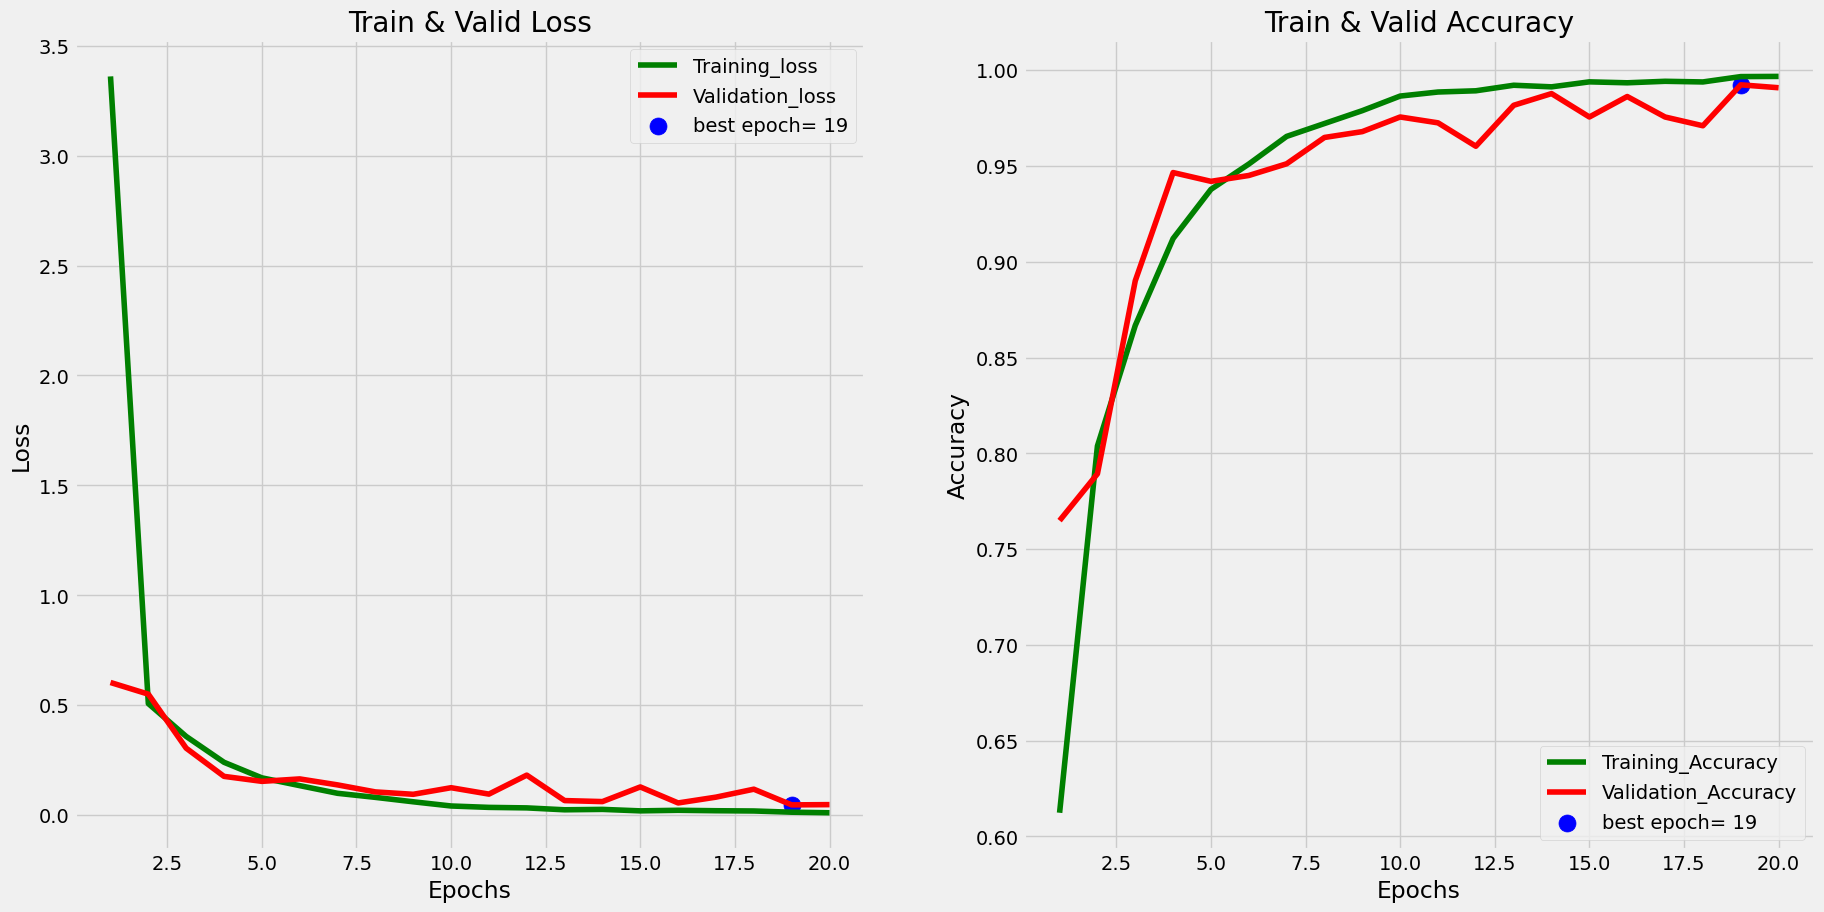

In [30]:
# Plotting loss and accuracy curves for training and valoidation data
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
valid_accuracy = history.history['val_accuracy']
valid_loss = history.history['val_loss']
index_loss = np.argmin(valid_loss)
valid_lowest = valid_loss[index_loss]
index_accuracy = np.argmax(valid_accuracy)
accuracy_highest = valid_accuracy[index_accuracy]

Epochs = [i+1 for i in range(len(train_accuracy))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_accuracy + 1)}'

# Plot training history
plt.figure(figsize= (20, 10))     # plot size
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)       # Plot for loss
plt.plot(Epochs, train_loss, 'g', label= 'Training_loss')
plt.plot(Epochs, valid_loss, 'r', label= 'Validation_loss')
plt.scatter(index_loss + 1, valid_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Train & Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)      # plot for accuracy
plt.plot(Epochs, train_accuracy, 'g', label= 'Training_Accuracy')
plt.plot(Epochs, valid_accuracy, 'r', label= 'Validation_Accuracy')
plt.scatter(index_accuracy + 1 , accuracy_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Train & Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [32]:
# Model evaluation on training, testing, & validation dataset
train_score = model2.evaluate(training_gen, verbose= 1)
valid_score = model2.evaluate(validation_gen, verbose= 1)
test_score = model2.evaluate(testing_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 3s 69ms/step - loss: 0.0558 - accuracy: 0.9832
Train Loss:  0.02512364462018013
Train Accuracy:  0.994397759437561
--------------------
Validation Loss:  0.04766589030623436
Validation Accuracy:  0.9908397197723389
--------------------
Test Loss:  0.05581207573413849
Test Accuracy:  0.9832317233085632


In [33]:
# Predicting probabilities and classes for testing data
preds = model2.predict(testing_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 4s 79ms/step


[[145   4   0   0]
 [  1 142   4   1]
 [  0   0 208   0]
 [  0   1   0 150]]


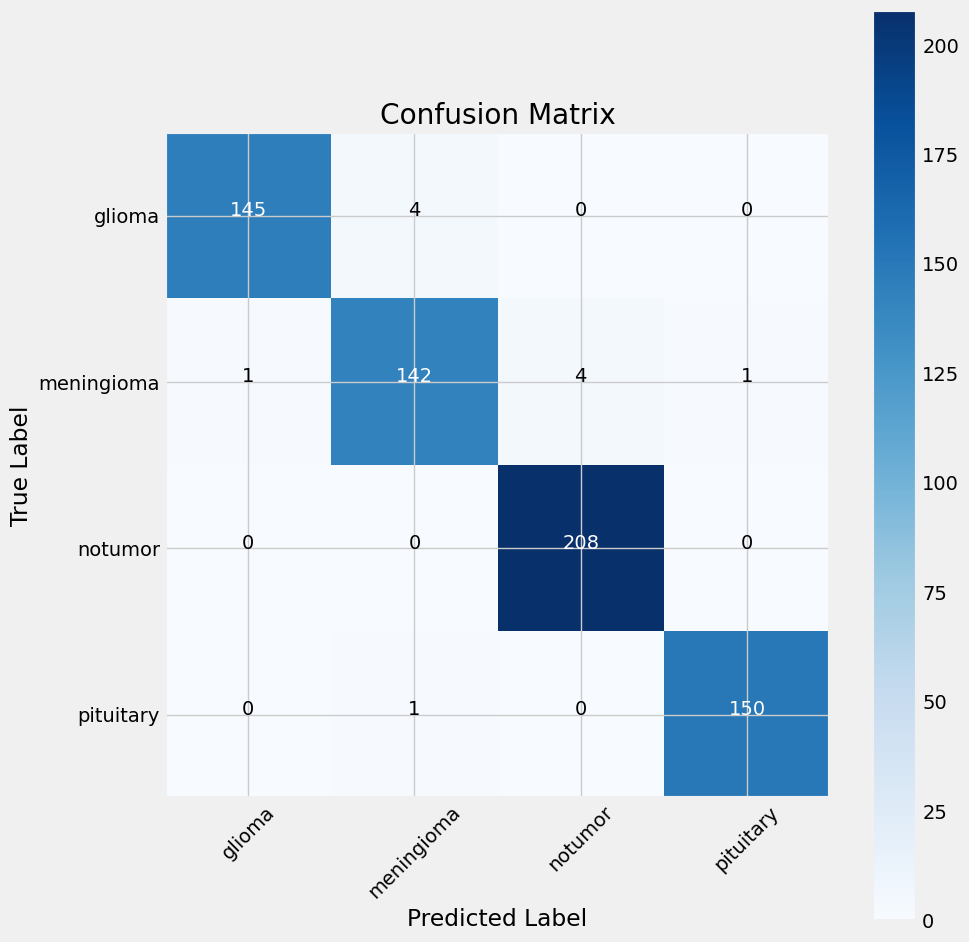

In [34]:
# confusion matrix and other parameters
import itertools

g_dict = testing_gen.class_indices
classes = list(g_dict.keys())

con_matrix = confusion_matrix(testing_gen.classes, y_pred)
print(con_matrix)

plt.figure(figsize= (10, 10))
plt.imshow(con_matrix, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = con_matrix.max() / 2.
for i, j in itertools.product(range(con_matrix.shape[0]), range(con_matrix.shape[1])):
    plt.text(j, i, con_matrix[i, j], horizontalalignment= 'center', color= 'white' if con_matrix[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [35]:
# Classification report
print(classification_report(testing_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       149
  meningioma       0.97      0.96      0.96       148
     notumor       0.98      1.00      0.99       208
   pituitary       0.99      0.99      0.99       151

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



## Transfer learning with VGG19


In [ ]:
# Importing important modules and pretrained VGG19 model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [ ]:
# Utilizing VGG19 model with weights trained on imagenet dataset
img_size = 240
class_count = len(list(training_gen.class_indices.keys()))

base_model = VGG19(input_shape = (img_size, img_size, 3), include_top = False, weights = 'imagenet')
for layer in base_model.layers[:-5]:      # Layers from bottom to -5 are not trainable i.e. freezed
    layer.trainable = False

for layer in base_model.layers[-5:]:      # Unfreezing last 5 layers to train on our dataset
    layer.trainable = True

# building our own architecture
model = Sequential()
model.add(Input(shape = (img_size, img_size, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))     # Adding dropout layers for reduce overfitting
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(class_count, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 23236292 (88.64 MB)
Trainable params: 12

In [ ]:
# Model training
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.0001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

batch_size = 32
epochs = 20
history = model.fit(training_gen,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = validation_gen,
                    shuffle = False)

Epoch 1/20
357/357 [==============================] - 44s 117ms/step - loss: 0.6362 - accuracy: 0.8151 - val_loss: 0.3251 - val_accuracy: 0.8794
Epoch 2/20
357/357 [==============================] - 40s 112ms/step - loss: 0.2795 - accuracy: 0.9021 - val_loss: 0.2419 - val_accuracy: 0.8962
Epoch 3/20
357/357 [==============================] - 39s 110ms/step - loss: 0.1912 - accuracy: 0.9317 - val_loss: 0.1753 - val_accuracy: 0.9313
Epoch 4/20
357/357 [==============================] - 41s 114ms/step - loss: 0.1226 - accuracy: 0.9590 - val_loss: 0.1616 - val_accuracy: 0.9450
Epoch 5/20
357/357 [==============================] - 39s 110ms/step - loss: 0.0963 - accuracy: 0.9671 - val_loss: 0.0973 - val_accuracy: 0.9634
Epoch 6/20
357/357 [==============================] - 39s 110ms/step - loss: 0.1005 - accuracy: 0.9687 - val_loss: 0.1531 - val_accuracy: 0.9466
Epoch 7/20
357/357 [==============================] - 40s 111ms/step - loss: 0.1523 - accuracy: 0.9580 - val_loss: 0.1177 - val_ac

## Transfer Learning with ResNet50

In [ ]:
# Importing required modeules and ResNet50 model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

img_size = 240
class_count = len(list(training_gen.class_indices.keys()))

base_model = ResNet50(input_shape=(img_size, img_size, 3), include_top=False, pooling='avg', classes=4, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False    # Unfreezing only dense layer

# Building our own model
model = Sequential()

model.add(Input(shape=(img_size, img_size, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', input_shape=(131072,)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dropout_32 (Dropout)        (None, 2048)              0         
                                                                 
 dense_32 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 24638852 (93.99 MB)
Trainable params: 1

In [ ]:
# Model training on our dataset
from tensorflow.keras.optimizers import Adam

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set batch size and epochs
batch_size = 32
epochs = 30

# Train the model
history = model.fit(training_gen,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_gen,
                    batch_size=batch_size,
                    shuffle=False)


Epoch 1/20
357/357 [==============================] - 32s 79ms/step - loss: 0.5752 - accuracy: 0.7777 - val_loss: 0.3297 - val_accuracy: 0.8718
Epoch 2/20
357/357 [==============================] - 25s 69ms/step - loss: 0.3384 - accuracy: 0.8720 - val_loss: 0.2787 - val_accuracy: 0.8809
Epoch 3/20
357/357 [==============================] - 25s 70ms/step - loss: 0.2825 - accuracy: 0.8967 - val_loss: 0.2730 - val_accuracy: 0.9023
Epoch 4/20
357/357 [==============================] - 24s 68ms/step - loss: 0.2498 - accuracy: 0.9069 - val_loss: 0.2670 - val_accuracy: 0.8947
Epoch 5/20
357/357 [==============================] - 24s 68ms/step - loss: 0.2321 - accuracy: 0.9126 - val_loss: 0.2232 - val_accuracy: 0.9084
Epoch 6/20
357/357 [==============================] - 24s 68ms/step - loss: 0.2041 - accuracy: 0.9214 - val_loss: 0.1872 - val_accuracy: 0.9328
Epoch 7/20
357/357 [==============================] - 24s 68ms/step - loss: 0.1937 - accuracy: 0.9291 - val_loss: 0.2211 - val_accuracy: